### Load Dataset

In [432]:
#Load data
import pandas as pd

data = pd.read_csv('day.csv')

### 1. Understanding Data

In [433]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [434]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [435]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<p>Check Null Value</p>

In [436]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 2. Data Cleaning

In [437]:
data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)


#### Columns Dropped from Analysis

The following columns have been removed from the dataset as they are not required for calculating the total number of users:

* `instant`: Likely an index or unique identifier, not relevant to user count.
* `dteday`: Contains date information, but in the dataset year and month information is given.
* `casual`: Holds the number of casual users, but we need the combined total.
* `registered`: Similar to `casual`, this column counts registered users, not the complete user base.


In [438]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [439]:
data.shape

(730, 12)

In [440]:
# Check Correlation
data.corr()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


<Axes: >

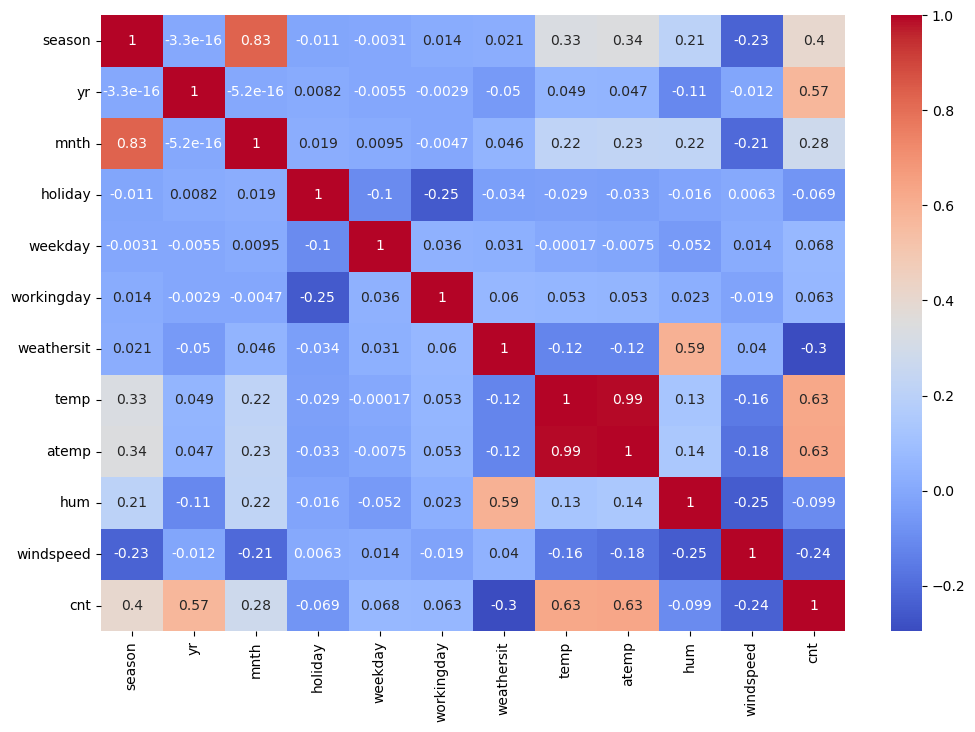

In [441]:
# Check for Correlation using Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

<p>temp and atemp are highly correlated
<p> We need to drop atemp

In [442]:
data.drop('atemp', axis=1, inplace=True)

In [443]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [444]:
data.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
725,1,1,12,0,4,1,2,10.420847,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,48.3333,23.500518,1796
729,1,1,12,0,1,1,2,8.849153,57.7500,10.374682,2729


In [445]:
data.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [446]:
# Deal with Categorical Data
data['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [447]:
data['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [448]:
data['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [449]:
data['holiday'].value_counts()



holiday
0    709
1     21
Name: count, dtype: int64

In [450]:
data['weekday'].value_counts()


weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [451]:

data['workingday'].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [452]:
data['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [453]:
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

data['mnth'] = data['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
data['weekday'] = data['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
data['weathersit'] = data['weathersit'].map({1: 'Clear_Few_Clouds_PartlyCloudy', 2: 'Mist_Cloudy_BrokenClouds', 3: 'LightSnow_Rain_Thunderstorm_ScatteredClouds', 4: 'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})



* The existing `'season'` column (assuming it contains numerical values representing seasons) is mapped to a dictionary.
* The dictionary maps numerical values (1, 2, 3, 4) to their corresponding season names ("spring", "summer", "fall", "winter").
* The existing `'mnth'` column (assuming it contains numerical values representing months) is mapped to a dictionary.
* The dictionary maps numerical values (1 to 12) to their corresponding month abbreviations ("Jan", "Feb", ..., "Dec").
* The existing `'weekday'` column (assuming it contains numerical values representing weekdays) is mapped to a dictionary.
* The dictionary maps numerical values (0 to 6) to their corresponding weekday names ("Sun", "Mon", ..., "Sat").
* The existing `'weathersit'` column (assuming it contains numerical values representing weather conditions) is mapped to a dictionary.
* The dictionary maps numerical values (1 to 4) to more descriptive weather condition names ("Clear_Few_Clouds_PartlyCloudy", "Mist_Cloudy_BrokenClouds", "LightSnow_Rain_Thunderstorm_ScatteredClouds", "Heavy_Rain_Ice_Pallets_Thunderstorm_Mist").

In [454]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist_Cloudy_BrokenClouds,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist_Cloudy_BrokenClouds,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear_Few_Clouds_PartlyCloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear_Few_Clouds_PartlyCloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear_Few_Clouds_PartlyCloudy,9.305237,43.6957,12.522300,1600


In [455]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### 3. Exploratory Data Analysis

<Axes: xlabel='weekday', ylabel='cnt'>

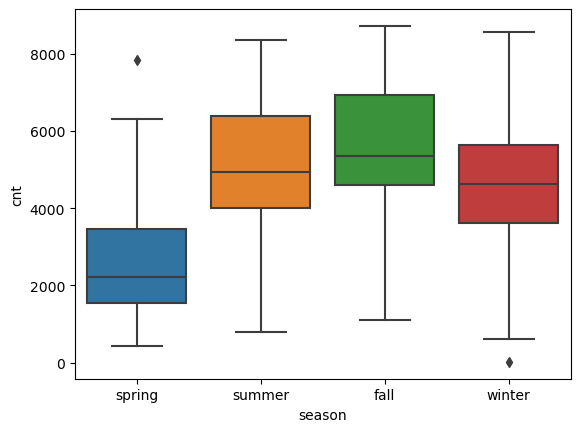

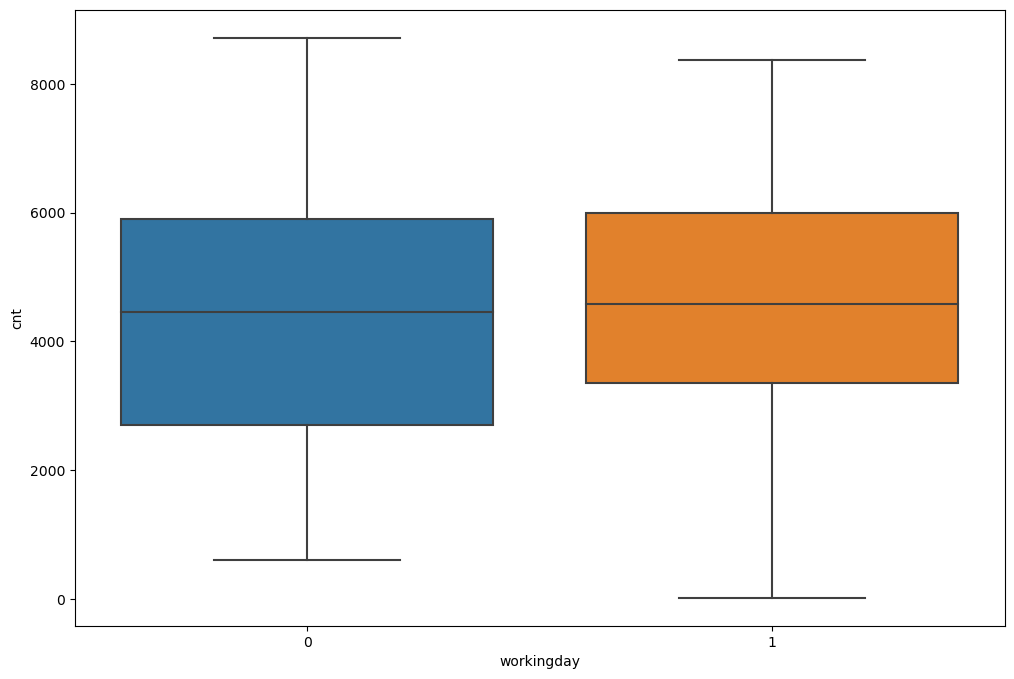

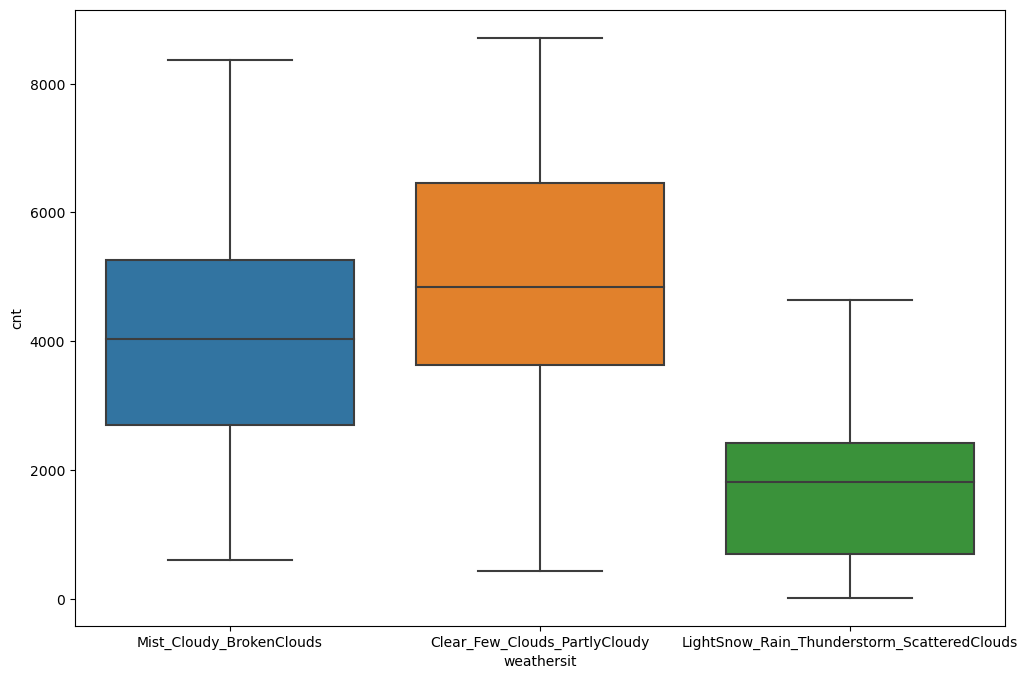

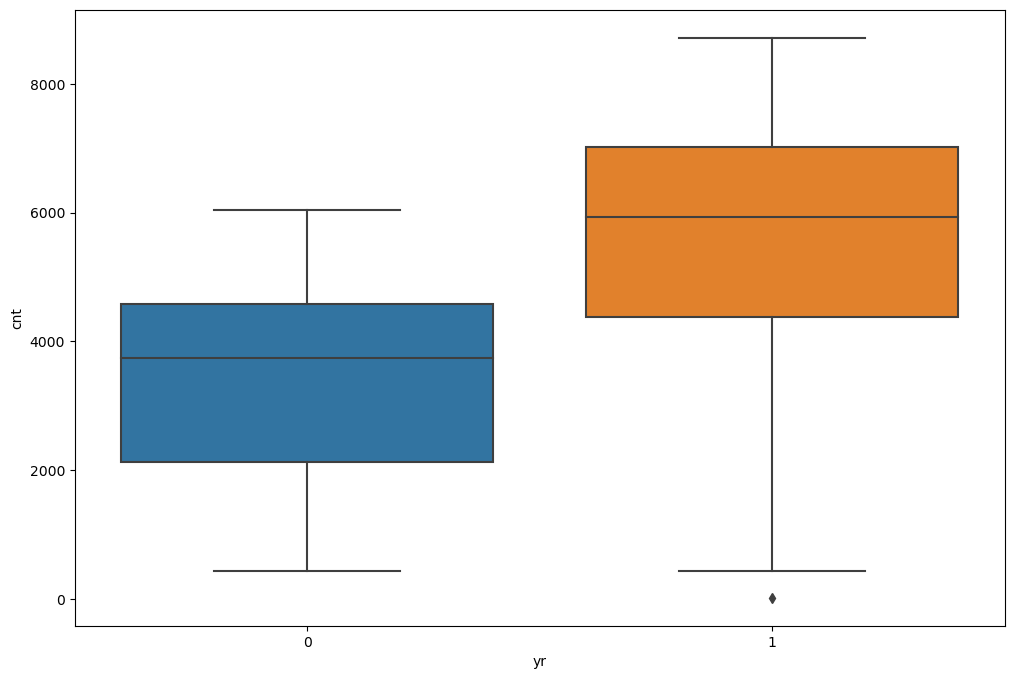

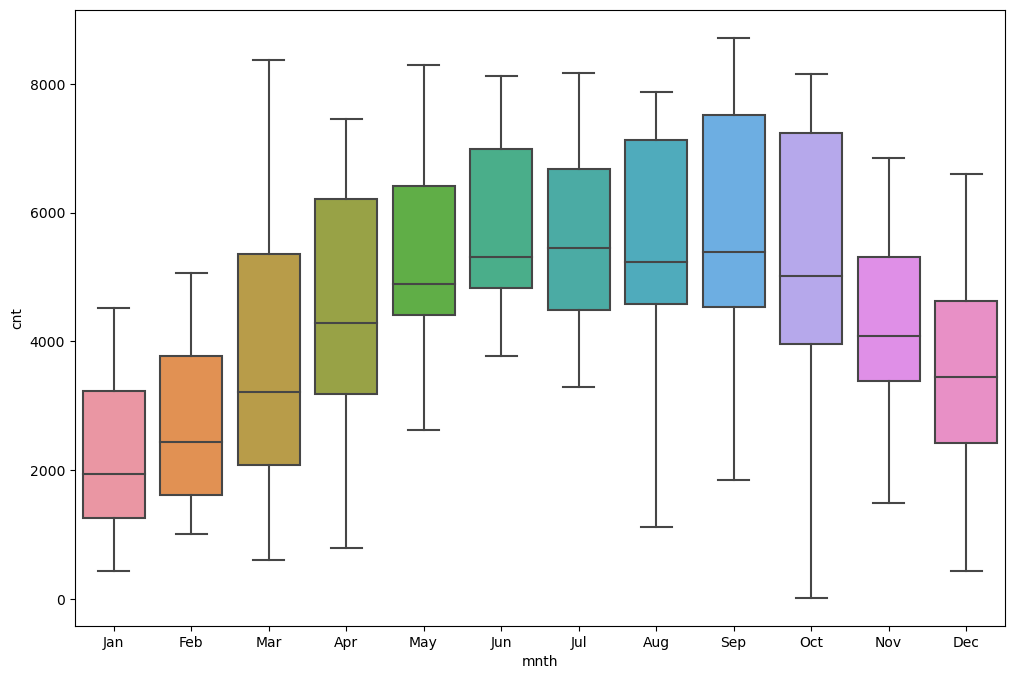

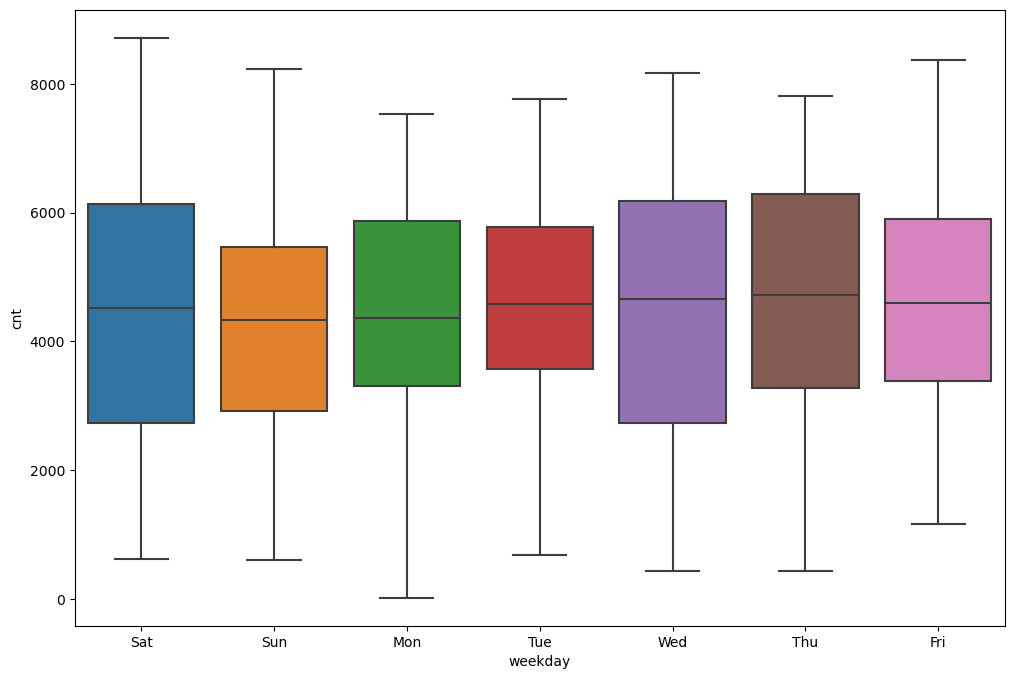

In [456]:
# Visualize the Data
sns.boxplot(x=data['season'], y=data['cnt'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=data['workingday'], y=data['cnt'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=data['weathersit'], y=data['cnt'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=data['yr'], y=data['cnt'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=data['mnth'], y=data['cnt'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=data['weekday'], y=data['cnt'])



<p>Interpretation:
<p>The boxplot for season shows that the count of bikes is highest in fall and lowest in spring
<p>The boxplot for workingday shows that the count of bikes is higher on working days than non-working days
<p>The boxplot for weathersit shows that the count of bikes is highest when the weather is clear and few clouds
<p>The boxplot for year shows that the count of bikes is higher in 2019 than 2018
<p>The boxplot for month shows that the count of bikes is highest in September and lowest in January
<p>The boxplot for weekday shows that the count of bikes is highest on Saturday and lowest on Monday


In [457]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist_Cloudy_BrokenClouds,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist_Cloudy_BrokenClouds,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear_Few_Clouds_PartlyCloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear_Few_Clouds_PartlyCloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear_Few_Clouds_PartlyCloudy,9.305237,43.6957,12.522300,1600


c:\Users\uttam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


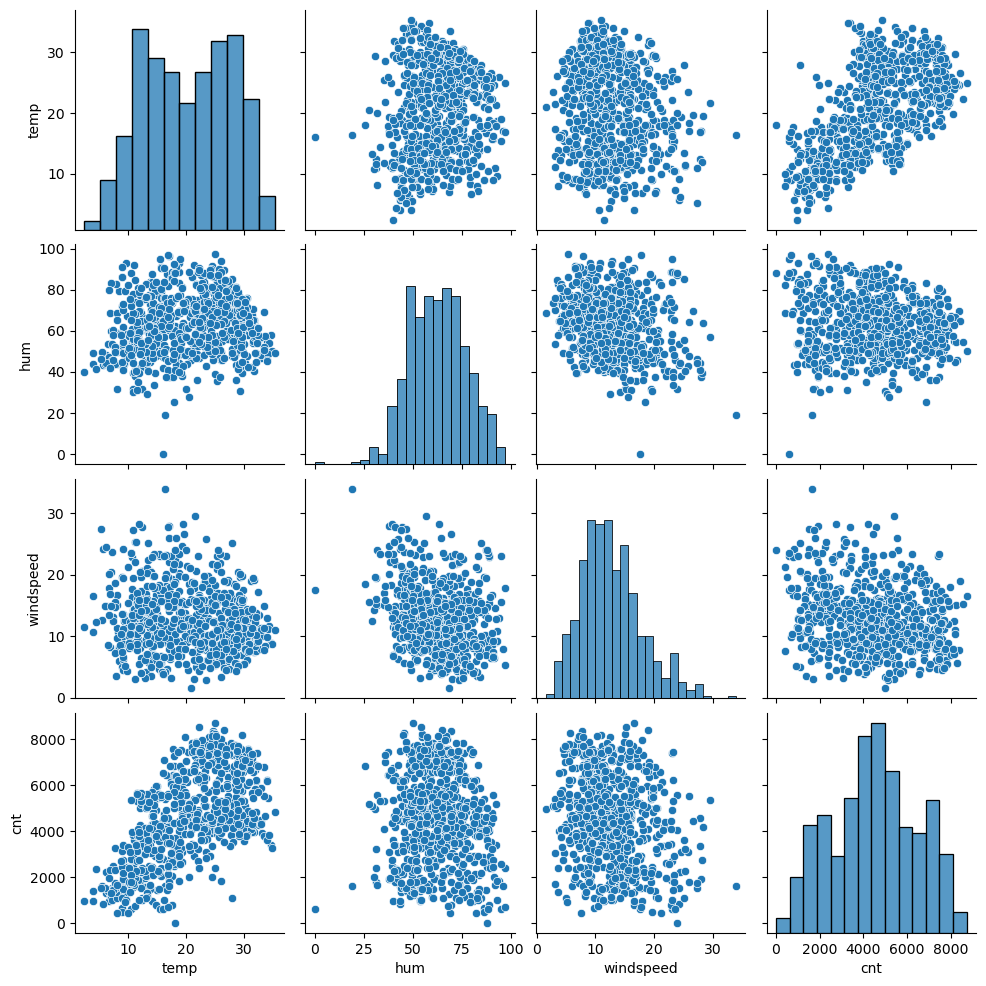

In [458]:

# Pair plot for numerical variables
sns.pairplot(data[['temp', 'hum', 'windspeed', 'cnt']])
plt.show()



In [459]:
season_dum = pd.get_dummies(data['season'],drop_first=True)
mnth_dum = pd.get_dummies(data['mnth'],drop_first=True)
weekday_dum = pd.get_dummies(data['weekday'],drop_first=True)
weathersit_dum = pd.get_dummies(data['weathersit'],drop_first=True)



<p> Drop the columns for which we have created the dummies
 <p> Concatenate the original DataFrame and the DataFrame with the dummies

In [460]:
data = pd.concat([data,season_dum,mnth_dum,weekday_dum,weathersit_dum],axis=1)
data.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [461]:
data.shape

(730, 29)

In [462]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(30)
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [463]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow_Rain_Thunderstorm_ScatteredClouds,Mist_Cloudy_BrokenClouds
367,1,0,1,6.150000,44.1250,24.499957,2236,True,False,False,...,False,False,False,False,False,False,True,False,False,False
648,1,0,1,17.835000,46.3333,12.166932,7570,False,False,True,...,True,False,False,False,False,True,False,False,False,False
44,0,0,1,17.015000,37.5833,27.999836,1913,True,False,False,...,False,False,True,False,False,False,False,False,False,False
705,1,0,1,13.154153,76.4167,8.750200,5008,False,False,True,...,False,False,False,False,False,False,False,False,False,True
379,1,0,0,6.833347,41.9167,16.834286,2311,True,False,False,...,False,False,False,False,True,False,False,False,False,False


### 4. Feature Scaling

In [464]:
# Feature Scaling with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['temp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow_Rain_Thunderstorm_ScatteredClouds,Mist_Cloudy_BrokenClouds
367,1,0,1,0.113228,0.454701,0.695175,2236,True,False,False,...,False,False,False,False,False,False,True,False,False,False
648,1,0,1,0.468352,0.477458,0.299450,7570,False,False,True,...,True,False,False,False,False,True,False,False,False,False
44,0,0,1,0.443431,0.387290,0.807474,1913,True,False,False,...,False,False,True,False,False,False,False,False,False,False
705,1,0,1,0.326094,0.787463,0.189819,5008,False,False,True,...,False,False,False,False,False,False,False,False,False,True
379,1,0,0,0.133996,0.431945,0.449210,2311,True,False,False,...,False,False,False,False,True,False,False,False,False,False


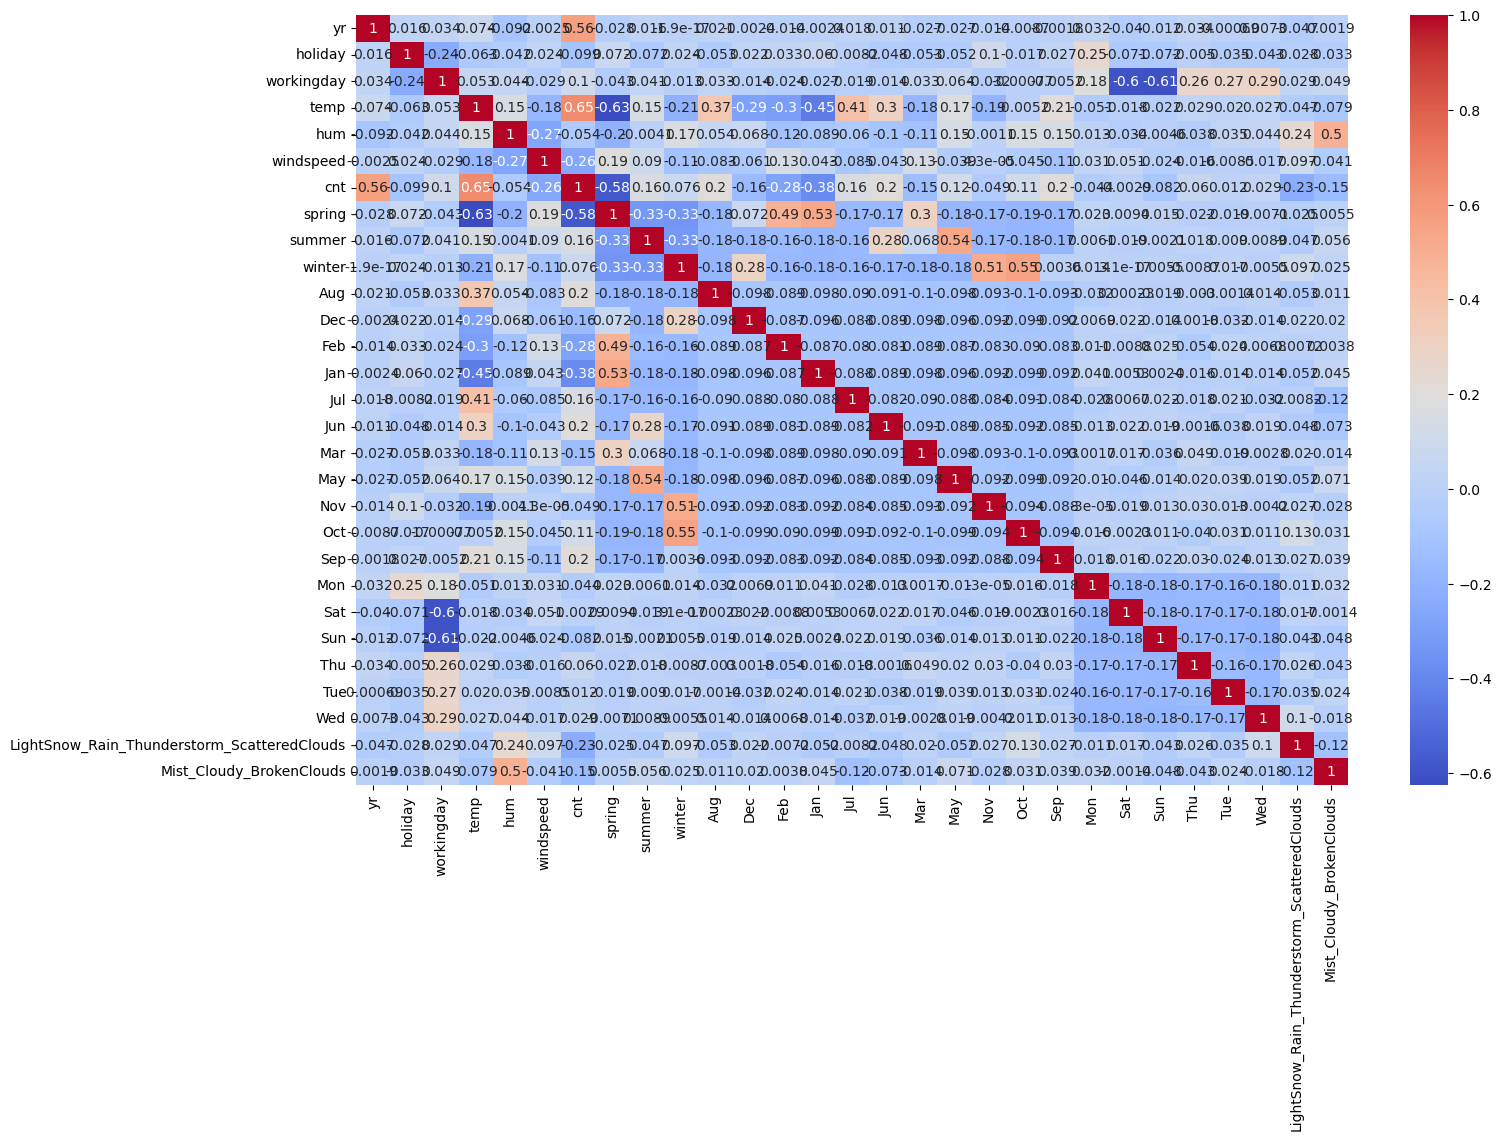

In [465]:
# Plotting the correlation matrix
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="coolwarm")
plt.show()

In [466]:
# Dividing data into X and y variables
y_train = df_train.pop('cnt')
X_train = df_train

### 5. Model Building

In [467]:

import statsmodels.api as sm

x_train_lm = sm.add_constant(X_train[["temp"]])
lr = sm.OLS(y_train, x_train_lm).fit()

In [468]:
lr.params

const    1477.206861
temp     5634.496886
dtype: float64

In [469]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     421.8
Date:                Wed, 29 May 2024   Prob (F-statistic):           6.57e-71
Time:                        12:44:11   Log-Likelihood:                -5095.7
No. Observations:                 584   AIC:                         1.020e+04
Df Residuals:                     582   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1477.2069    159.850      9.241      0.000    1163.253    1791.161
temp        5634.4969    274.341     20.538      0.000    5095.677    6173.317
==============================================================================
Omnibus:                        9.280   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.317
Skew:                           0.111   Prob(JB):                       0.0425
Kurtosis:                       2.542   Cond. No.                         5.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [470]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'LightSnow_Rain_Thunderstorm_ScatteredClouds',
       'Mist_Cloudy_BrokenClouds'],
      dtype='object')

In [471]:
x_train_lm = sm.add_constant(X_train)

mlr_2 = sm.OLS(y_train.astype(float), x_train_lm.astype(float)).fit()


In [472]:
mlr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.29e-216
Time:                        12:44:11   Log-Likelihood:                -4683.8
No. Observations:                 584   AIC:                             9424.
Df Residuals:                     556   BIC:                             9546.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        2116.3077    286.360      7.390      0.000    1553.829    2678.787
yr                                           1992.1137     64.041     31.107      0.000    1866.322    2117.906
holiday                                        75.1130    186.336      0.403      0.687    -290.896     441.122
workingday                                    873.2907     98.366      8.878      0.000     680.077    1066.504
temp                                         3894.1317    367.025     10.610      0.000    3173.207    4615.057
hum                                         -1247.6140    313.743     -3.977      0.000   -1863.880    -631.348
windspeed                                   -1578.8155    206.282     -7.654      0.000   -1984.002   -1173.629
spring                                       -485.2149    236.605     -2.051      0.041    -949.963     -20.467
summer                                        365.3912    208.762      1.750      0.081     -44.667     775.449
winter                                        946.8318    214.196      4.420      0.000     526.100    1367.563
Aug                                           144.2902    267.459      0.539      0.590    -381.064     669.645
Dec                                          -452.7629    266.905     -1.696      0.090    -977.028      71.502
Feb                                          -250.8636    263.578     -0.952      0.342    -768.594     266.866
Jan                                          -514.5105    271.864     -1.893      0.059   -1048.516      19.495
Jul                                          -304.3071    277.797     -1.095      0.274    -849.967     241.353
Jun                                            78.5025    194.202      0.404      0.686    -302.957     459.962
Mar                                            22.5469    203.302      0.111      0.912    -376.787     421.880
May                                           156.1537    166.651      0.937      0.349    -171.188     483.496
Nov                                          -438.5035    290.096     -1.512      0.131   -1008.322     131.315
Oct                                           111.6564    281.676      0.396      0.692    -441.623     664.935
Sep                                           669.1659    253.959      2.635      0.009     170.330    1168.002
Mon                                          -208.7946    123.028     -1.697      0.090    -450.451      32.862
Sat                                           847.1192    109.661      7.725      0.000     631.719    1062.519
Sun                                           320.7847    109.304      2.935      0.003     106.086     535.483
Thu                                           -82.7512    1

In [473]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns


vif['VIF'] = [variance_inflation_factor(X.astype(float).values, i) for i in range(X.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,88.20
22,Sun,20.33
21,Sat,19.90
6,spring,10.82
8,winter,8.83
7,summer,8.31
3,temp,7.01
18,Oct,6.83
17,Nov,6.39
9,Aug,6.06


In [474]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

# Running RFE with the output number of variables equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# Assuming X_train is your feature matrix
rfe = RFE(lm,n_features_to_select=20)              
rfe = rfe.fit(X_train, y_train)


In [475]:
rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
0,yr,True,1
22,Sun,True,1
21,Sat,True,1
20,Mon,True,1
19,Sep,True,1
17,Nov,True,1
26,LightSnow_Rain_Thunderstorm_ScatteredClouds,True,1
12,Jan,True,1
11,Feb,True,1
10,Dec,True,1


In [476]:
selected_features= X_train.columns[rfe.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep', 'Mon',
       'Sat', 'Sun', 'LightSnow_Rain_Thunderstorm_ScatteredClouds',
       'Mist_Cloudy_BrokenClouds'],
      dtype='object')

In [477]:

x_train_rfe = X_train[selected_features]
x_train_lm = sm.add_constant(x_train_rfe)


mlr_3 = sm.OLS(y_train.astype(float), x_train_lm.astype(float)).fit()


print(mlr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.77e-224
Time:                        12:44:11   Log-Likelihood:                -4685.8
No. Observations:                 584   AIC:                             9412.
Df Residuals:                     564   BIC:                             9499.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [478]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.astype(float).values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,60.13
17,Sun,14.58
16,Sat,14.06
6,spring,5.89
3,temp,4.74
1,holiday,3.70
8,winter,3.64
7,summer,2.79
11,Jan,2.35
4,hum,1.97


In [479]:
x_train_rfe.drop(["workingday"], axis=1, inplace=True)

C:\Users\uttam\AppData\Local\Temp\ipykernel_16660\1462332319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_rfe.drop(["workingday"], axis=1, inplace=True)


In [480]:
x_train_lm = sm.add_constant(x_train_rfe)


mlr_4 = sm.OLS(y_train.astype(float), x_train_lm.astype(float)).fit()


print(mlr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.77e-224
Time:                        12:44:11   Log-Likelihood:                -4685.8
No. Observations:                 584   AIC:                             9412.
Df Residuals:                     564   BIC:                             9499.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [481]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.astype(float).values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,32.27
2,temp,18.77
5,spring,5.63
4,windspeed,4.76
7,winter,3.82
6,summer,2.82
10,Jan,2.39
18,Mist_Cloudy_BrokenClouds,2.36
0,yr,2.12
9,Feb,2.03


In [482]:
x_train_rfe.drop(["hum"], axis=1, inplace=True)


C:\Users\uttam\AppData\Local\Temp\ipykernel_16660\974272797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_rfe.drop(["hum"], axis=1, inplace=True)


In [483]:

x_train_lm = sm.add_constant(x_train_rfe)


mlr_5 = sm.OLS(y_train.astype(float), x_train_lm.astype(float)).fit()


print(mlr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     182.7
Date:                Wed, 29 May 2024   Prob (F-statistic):          9.62e-222
Time:                        12:44:11   Log-Likelihood:                -4694.3
No. Observations:                 584   AIC:                             9427.
Df Residuals:                     565   BIC:                             9510.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [484]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.astype(float).values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,temp,5.57
3,windspeed,4.70
4,spring,4.50
6,winter,2.87
5,summer,2.30
9,Jan,2.22
0,yr,2.09
8,Feb,1.99
11,Nov,1.71
10,Jul,1.62


In [485]:
x_train_rfe.drop(["Sat"], axis=1, inplace=True)

C:\Users\uttam\AppData\Local\Temp\ipykernel_16660\1040485233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_rfe.drop(["Sat"], axis=1, inplace=True)


In [486]:

x_train_lm = sm.add_constant(x_train_rfe)


mlr_6 = sm.OLS(y_train.astype(float), x_train_lm.astype(float)).fit()


print(mlr_6.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     193.5
Date:                Wed, 29 May 2024   Prob (F-statistic):          8.84e-223
Time:                        12:44:11   Log-Likelihood:                -4694.6
No. Observations:                 584   AIC:                             9425.
Df Residuals:                     566   BIC:                             9504.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [487]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.astype(float).values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.49
3,windspeed,4.67
4,spring,4.49
6,winter,2.86
5,summer,2.30
9,Jan,2.22
0,yr,2.09
8,Feb,1.99
11,Nov,1.71
10,Jul,1.62


In [488]:
x_train_rfe.drop(["Mon"], axis=1, inplace=True)

C:\Users\uttam\AppData\Local\Temp\ipykernel_16660\1411379941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_rfe.drop(["Mon"], axis=1, inplace=True)


In [489]:
x_train_lm = sm.add_constant(x_train_rfe)


mlr_7 = sm.OLS(y_train.astype(float), x_train_lm.astype(float)).fit()

print(mlr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     204.9
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.22e-223
Time:                        12:45:18   Log-Likelihood:                -4695.9
No. Observations:                 584   AIC:                             9426.
Df Residuals:                     567   BIC:                             9500.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------